# Bitcoin price visualisation and correlation with social networks sentiment



## Bitcoin Price  from 13-01-2017 to 12-01-2022 

5 years of data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [95]:
api_key='a58413697e8263de9c95cab92049ea3f'
symbol='BTCUSD'
query=f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}'
response=requests.get(query)
df = pd.DataFrame(response.json()['historical'])
df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2022-01-13,43961.882600,44063.206600,43517.879000,43974.387800,43974.387800,7.289616e+10,7.289616e+10,12.50520,0.028,43851.82447,"January 13, 22",0.00028
1,2022-01-12,42776.830200,42942.709400,42588.767200,42839.807600,42839.807600,2.654798e+10,2.654798e+10,62.97740,0.147,42790.42807,"January 12, 22",0.00147
2,2022-01-11,41861.042700,42148.080100,41703.983200,42148.080100,42148.080100,3.467735e+10,3.467735e+10,287.03740,0.686,42000.04780,"January 11, 22",0.00686
3,2022-01-10,41932.756900,42253.057500,41772.873600,41919.103900,41919.103900,2.200912e+10,2.200912e+10,-13.65300,-0.033,41981.67833,"January 10, 22",-0.00033
4,2022-01-09,41808.563900,42710.280700,41473.902200,41963.416500,41963.416500,2.250029e+10,2.250029e+10,154.85260,0.370,42049.19980,"January 09, 22",0.00370
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2017-01-18,909.372986,917.499023,858.304016,886.617981,886.617981,2.256770e+08,2.256770e+08,-22.75501,-2.502,887.47367,"January 18, 17",-0.02502
1822,2017-01-17,830.945984,910.560974,830.796021,907.937988,907.937988,1.550950e+08,1.550950e+08,76.99200,9.266,883.09833,"January 17, 17",0.09266
1823,2017-01-16,821.783020,834.530029,820.270996,831.533997,831.533997,8.275520e+07,8.275520e+07,9.75098,1.187,828.77834,"January 16, 17",0.01187
1824,2017-01-15,818.142029,823.307007,812.870972,821.797974,821.797974,7.101360e+07,7.101360e+07,3.65595,0.447,819.32532,"January 15, 17",0.00447


In [96]:
Bitcoin_price_df = df[['date','close','changePercent']]

In [97]:
Bitcoin_price_df['date']= pd.to_datetime(Bitcoin_price_df['date'])

/tmp/ipykernel_5264/2808514875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bitcoin_price_df['date']= pd.to_datetime(Bitcoin_price_df['date'])


In [98]:
Bitcoin_price_df.set_index('date', inplace = True)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

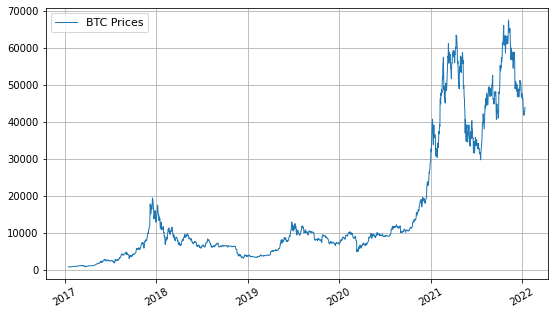

In [99]:
plt.figure(figsize=(9,5))
plt.plot(Bitcoin_price_df['close'],lw=1, label='BTC Prices')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

## Sentiment data 

### Twitter data

In [7]:
tweet_content_df = pd.read_csv('../cryptocurrency_trading/data/tweet_content_010921.csv')

In [6]:
tweet_content_df.head()

NameError: name 'tweet_content_df' is not defined

Example of tweet

In [5]:
tweet_content_df['text'][0]

NameError: name 'tweet_content_df' is not defined

Number of tweet containing the keyword 'Bitcoin' per day

In [103]:
tweet_count_df = pd.read_csv('../cryptocurrency_trading/data/tweet_count_010921.csv')

In [104]:
tweet_count_df.head()

,Unnamed: 0,end,start,tweet_count
0,0,2018-01-02T00:00:00.000Z,2018-01-01T00:00:00.000Z,90414
1,1,2018-01-03T00:00:00.000Z,2018-01-02T00:00:00.000Z,125905
2,2,2018-01-04T00:00:00.000Z,2018-01-03T00:00:00.000Z,134825
3,3,2018-01-05T00:00:00.000Z,2018-01-04T00:00:00.000Z,126106
4,4,2018-01-06T00:00:00.000Z,2018-01-05T00:00:00.000Z,115883


In [105]:
tweet_count_df.columns

Index(['Unnamed: 0', 'end', 'start', 'tweet_count'], dtype='object')

In [106]:
tweet_count_df =  tweet_count_df.drop(['start','Unnamed: 0'], axis =1)

In [107]:
tweet_count_df['end'] = pd.to_datetime(tweet_count_df['end'])

In [108]:
tweet_count_df['end'] = tweet_count_df['end'].dt.date

In [109]:
tweet_count_df

,end,tweet_count
0,2018-01-02,90414
1,2018-01-03,125905
2,2018-01-04,134825
3,2018-01-05,126106
4,2018-01-06,115883
...,...,...
1291,2021-08-29,275021
1292,2021-08-30,321682
1293,2021-08-31,305249
1294,2021-09-01,296186


In [110]:
tweet_count_df.set_index('end', inplace=True)

In [111]:
df = tweet_count_df.join(Bitcoin_price_df)
df.head()

,tweet_count,close,changePercent
2018-01-02,90414,14982.099609,9.960
2018-01-03,125905,15201.000000,1.487
2018-01-04,134825,15599.200195,2.151
2018-01-05,126106,17429.500000,12.614
2018-01-06,115883,17527.000000,0.372


In [120]:
df = df.reset_index()

In [121]:
df.head()

,level_0,index,tweet_count,close,changePercent
0,0,2018-01-02,90414,14982.099609,9.960
1,1,2018-01-03,125905,15201.000000,1.487
2,2,2018-01-04,134825,15599.200195,2.151
3,3,2018-01-05,126106,17429.500000,12.614
4,4,2018-01-06,115883,17527.000000,0.372


In [123]:
df.date = pd.to_datetime(df.index) 
df = df.set_index('index')

In [124]:
df.head()

,level_0,tweet_count,close,changePercent
index,,,,
2018-01-02,0,90414,14982.099609,9.960
2018-01-03,1,125905,15201.000000,1.487
2018-01-04,2,134825,15599.200195,2.151
2018-01-05,3,126106,17429.500000,12.614
2018-01-06,4,115883,17527.000000,0.372


Text(0.5, 1.0, 'Correlation between number of tweets and bitcoin price')

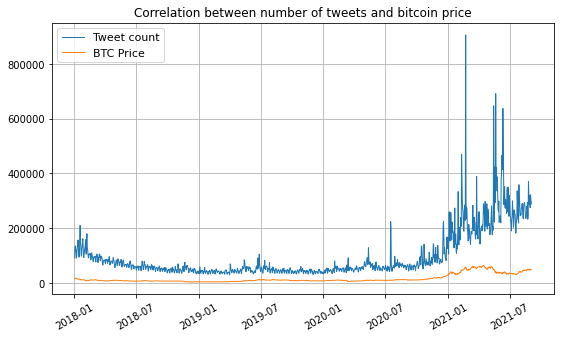

In [125]:
plt.figure(figsize=(9,5))
plt.plot(df['tweet_count'],lw=1, label='Tweet count')
plt.plot(df['close'],lw=1, label='BTC Price')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.title('Correlation between number of tweets and bitcoin price')

In [126]:
df_feb_2018 = df[29:57]
df_feb_2018.tail()

,level_0,tweet_count,close,changePercent
index,,,,
2018-02-24,52,88947,9813.070313,-4.614
2018-02-25,53,77639,9664.730469,-1.344
2018-02-26,54,77995,10366.700195,7.211
2018-02-27,55,91399,10725.599609,3.191
2018-02-28,56,96115,10397.900391,-2.707


In [127]:
df_feb_2018.head()

,level_0,tweet_count,close,changePercent
index,,,,
2018-02-01,29,127143,9170.540039,-10.420
2018-02-02,30,137124,8830.750000,-3.408
2018-02-03,31,157484,9174.910156,3.646
2018-02-04,32,110923,8277.009766,-9.794
2018-02-05,33,104837,6955.270020,-15.903


Text(0.5, 1.0, 'Correlation between number of tweets and bitcoin price')

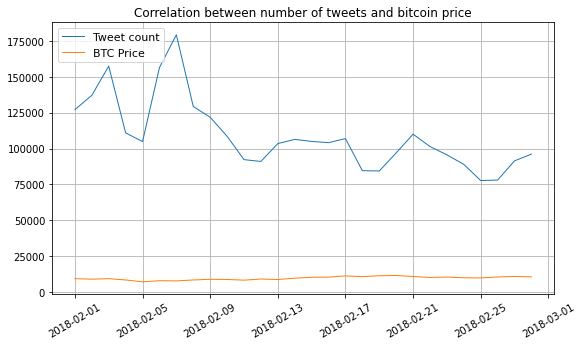

In [128]:
plt.figure(figsize=(9,5))
plt.plot(df_feb_2018['tweet_count'],lw=1, label='Tweet count')
plt.plot(df_feb_2018['close'],lw=1, label='BTC Price')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.title('Correlation between number of tweets and bitcoin price')

<AxesSubplot:>

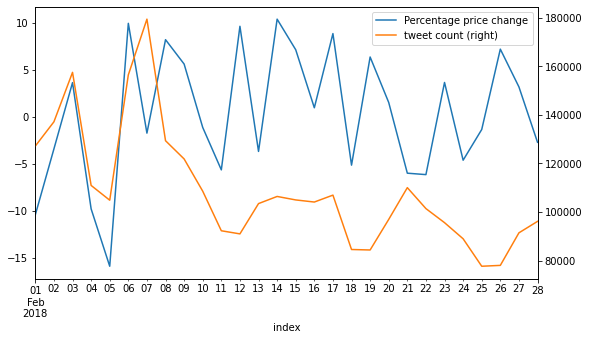

In [131]:
plt.figure(figsize=(9,5))
df_feb_2018.changePercent.plot(label='Percentage price change',legend= True)
df_feb_2018.tweet_count.plot(secondary_y=True, label = 'tweet count', legend = True)

<AxesSubplot:>

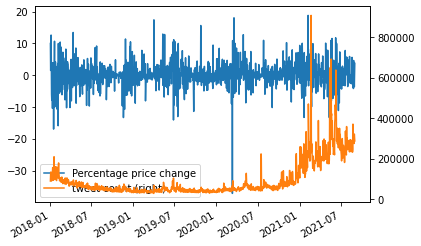

In [118]:
df.changePercent.plot(label='Percentage price change',legend= True)
df.tweet_count.plot(secondary_y=True, label = 'tweet count', legend = True)

In [117]:
import numpy as np

In [156]:
v1 = df.changePercent 
v2 = df.tweet_count

In [161]:
print(f"{np.corrcoef(v1[:-1], v2[:-1])[0][1]:.6f}")
0.333333
print(f"{np.corrcoef(v1[1:], v2[1:])[0][1]:.6f}")
0.916949
s1 = pd.Series(v1)
s2 = pd.Series(v2)
s1.rolling(5).corr(s2)

0.013735
0.015349


index
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-06   -0.372143
                ...   
2021-08-29    0.415831
2021-08-30   -0.083500
2021-08-31   -0.383022
2021-09-01   -0.472727
2021-09-01   -0.562827
Length: 1296, dtype: float64

###  Reddit data

In [136]:
reddit_df = pd.read_csv('../cryptocurrency_trading/data/final_reddit_data.csv')

In [137]:
reddit_df

,Unnamed: 0,date,real_score,post_per_day
0,0,2018-01-01,0.191187,464
1,1,2018-01-02,0.476037,594
2,2,2018-01-03,0.689065,620
3,3,2018-01-04,-0.144155,629
4,4,2018-01-05,0.197948,686
...,...,...,...,...
1236,1236,2021-08-27,0.472290,269
1237,1237,2021-08-28,0.417047,219
1238,1238,2021-08-29,0.835773,199
1239,1239,2021-08-30,0.722232,232


In [138]:
reddit_df = reddit_df.drop(['Unnamed: 0'], axis =1)

In [139]:
reddit_df['date'] = pd.to_datetime(reddit_df['date'])

In [140]:
reddit_df.head()

,date,real_score,post_per_day
0,2018-01-01,0.191187,464
1,2018-01-02,0.476037,594
2,2018-01-03,0.689065,620
3,2018-01-04,-0.144155,629
4,2018-01-05,0.197948,686


In [141]:
reddit_df.tail()

,date,real_score,post_per_day
1236,2021-08-27,0.472290,269
1237,2021-08-28,0.417047,219
1238,2021-08-29,0.835773,199
1239,2021-08-30,0.722232,232
1240,2021-08-31,0.628596,259


In [142]:
reddit_df.set_index('date', inplace=True)

In [143]:
reddit_df.head()

,real_score,post_per_day
date,,
2018-01-01,0.191187,464
2018-01-02,0.476037,594
2018-01-03,0.689065,620
2018-01-04,-0.144155,629
2018-01-05,0.197948,686


In [144]:
reddit_price_df = reddit_df.join(Bitcoin_price_df)

In [145]:
reddit_price_df.head()

,real_score,post_per_day,close,changePercent
date,,,,
2018-01-01,0.191187,464,13657.200195,-3.224
2018-01-02,0.476037,594,14982.099609,9.960
2018-01-03,0.689065,620,15201.000000,1.487
2018-01-04,-0.144155,629,15599.200195,2.151
2018-01-05,0.197948,686,17429.500000,12.614


In [153]:
reddit_price_feb_2018 = reddit_price_df[31:57]

In [154]:
reddit_price_feb_2018.tail()

,real_score,post_per_day,close,changePercent
date,,,,
2018-02-22,0.042140,368,10005.000000,-6.148
2018-02-23,0.451952,361,10301.099609,3.663
2018-02-26,0.444148,347,10366.700195,7.211
2018-02-27,0.516057,341,10725.599609,3.191
2018-02-28,0.437724,369,10397.900391,-2.707


<AxesSubplot:>

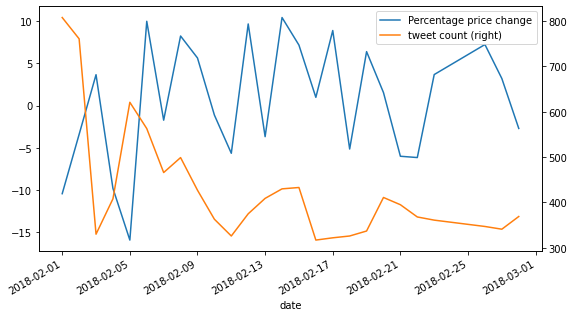

In [155]:
plt.figure(figsize=(9,5))
reddit_price_feb_2018.changePercent.plot(label='Percentage price change',legend= True)
reddit_price_feb_2018.post_per_day.plot(secondary_y=True, label = 'tweet count', legend = True)

Text(0.5, 1.0, 'Correlation between number of tweets and bitcoin price')

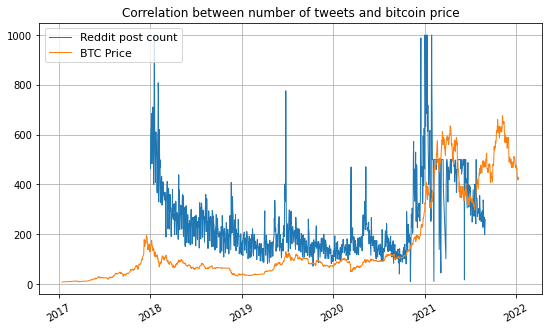

In [86]:
plt.figure(figsize=(9,5))
plt.plot(reddit_df['post_per_day'],lw=1, label='Reddit post count')
plt.plot(data['close']/100,lw=1, label='BTC Price')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.title('Correlation between number of reddit posts and bitcoin price')

In [8]:
tweet_content_df.head()

,Unnamed: 0,id,text,start,end
0,0,1425623064121724929,RT @WClementeIII: 76.8% of Bitcoin's money sup...,2018-01-01 00:00:00+00:00,2018-01-02T00:00:00Z
1,1,1425622402176675842,RT @1MillionTokens: 🥰1000 #1MT #Giveaway ( wor...,2018-01-01 00:00:00+00:00,2018-01-02T00:00:00Z
2,2,1425622403439267849,"RT @gladstein: 1/ My essay ""Inside Cuba's Bitc...",2018-01-01 00:00:00+00:00,2018-01-02T00:00:00Z
3,3,1425622403695058947,RT @AirdropDet: 🔍 New #Airdrop: META 1 Coin\n\...,2018-01-01 00:00:00+00:00,2018-01-02T00:00:00Z
4,4,1425622404194136066,RT @RewardHunters: Want to know about The Batt...,2018-01-01 00:00:00+00:00,2018-01-02T00:00:00Z


In [13]:
tweet_content_df.text[10]

'@BITCOIN_AL_DIA Buenisimos resultados de Coinbase con subidon de numero de usuarios y beneficios , indicando que no solo sigue el interes sino que va a mas https://t.co/YJyFWSgaVU'

In [15]:
cd ../cryptocurrency_trading/

/home/omar/code/omarbelhaj99/cryptocurrency_trading/cryptocurrency_trading
